# Task 4.10

## Table of Contents

1. Import Libraries + Dataset
2. Customer Profiling Variables
    - age
    - income
    - goods
    - number of dependents
3. Visualizations
4. Aggregate Customer Profiles
    - time between orders
    - expenditure
5. Compare Customer Profiles with Regions and Departments
    - age
    - income
    - goods
    - number of dependents
6. Export Final Data Set

# 01. Import Libraries + Dataset

In [1]:
# Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# define path
path = r'/Users/alliecarlisle/Desktop/CareerFoundry_Data_Analytics/Instacart Basket Analysis'

In [3]:
# high order customer dataset
df_customer = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final_high_orders.pkl'))

In [4]:
# check
df_customer.shape

(29303281, 30)

In [5]:
# display all columns
pd.options.display.max_columns = None

In [6]:
# check
df_customer.head(4)

,user_id,state,age,n_dependants,family_status,income,order_id,order_number,orders_day_of_the_week,order_hour_of_day,time_between_orders,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_time_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge,region,exclusion_flag
0,26711,Missouri,48,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Busiest days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No
1,26711,Missouri,48,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No
2,26711,Missouri,48,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No
3,26711,Missouri,48,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regular days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No


# 02. Customer Profiling Variables

### Age

In [13]:
# create an age flag
df_customer.loc[df_customer['age'] <= 25, 'age_profile'] = 'Young Adult'

In [14]:
df_customer.loc[(df_customer['age'] > 25) & (df_customer['age'] < 40), 'age_profile'] = 'Adult'

In [15]:
df_customer.loc[(df_customer['age'] >= 40) & (df_customer['age'] < 65), 'age_profile'] = 'Middle Aged'

In [16]:
df_customer.loc[df_customer['age'] >= 65, 'age_profile'] = 'Senior'

In [17]:
df_customer['age_profile'].value_counts(dropna = False)

Middle Aged    11453701
Senior          7754560
Adult           6438435
Young Adult     3656585
Name: age_profile, dtype: int64

In [20]:
# check
df_customer.head(4)

,user_id,state,age,n_dependants,family_status,income,order_id,order_number,orders_day_of_the_week,order_hour_of_day,time_between_orders,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_time_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge,region,exclusion_flag,age_profile
0,26711,Missouri,48,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Busiest days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged
1,26711,Missouri,48,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged
2,26711,Missouri,48,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged
3,26711,Missouri,48,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regular days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged


### Income

In [36]:
# create an income flag
df_customer.loc[df_customer['income'] <= 52200, 'income_profile'] = 'Lower'

In [37]:
df_customer.loc[(df_customer['income'] > 52200) & (df_customer['income'] < 156600), 'income_profile'] = 'Middle'

In [38]:
df_customer.loc[df_customer['income'] >= 156600, 'income_profile'] = 'Upper'

In [39]:
df_customer['income_profile'].value_counts(dropna = False)

Middle    23233532
Lower      3480218
Upper      2589531
Name: income_profile, dtype: int64

In [40]:
# check
df_customer.head(4)

,user_id,state,age,n_dependants,family_status,income,order_id,order_number,orders_day_of_the_week,order_hour_of_day,time_between_orders,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_time_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge,region,exclusion_flag,age_profile,parent_status,income_profile
0,26711,Missouri,48,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Busiest days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged,Parent,Upper
1,26711,Missouri,48,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged,Parent,Upper
2,26711,Missouri,48,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged,Parent,Upper
3,26711,Missouri,48,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regular days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged,Parent,Upper


### Goods

### Note - the loc function below is my first attempt, I figured out a faster way to do this using a for-loop if statement:

department_id_category = [ ] 

for value in df_customer['department_id']:
    if value in [3, 4, 12, 16, 20]:
        department_id_category.append('fresh')
    elif value in [1, 5, 6, 7, 9, 10, 13, 14, 15, 19]:
        department_id_category.append('dry')
    else:
        department_id_category.append('household supplies')
        
new line
df_customer['goods_profile'] = department_id_category

In [55]:
# create a goods flag, need to find a faster way to do this
df_customer.loc[df_customer['department_id'] == 3, 'goods_profile'] = 'Fresh'

In [56]:
df_customer.loc[df_customer['department_id'] == 4, 'goods_profile'] = 'Fresh'

In [57]:
df_customer.loc[df_customer['department_id'] == 12, 'goods_profile'] = 'Fresh'

In [59]:
df_customer.loc[df_customer['department_id'] == 16, 'goods_profile'] = 'Fresh'

In [60]:
df_customer.loc[df_customer['department_id'] == 20, 'goods_profile'] = 'Fresh'

In [62]:
df_customer.loc[df_customer['department_id'] == 1, 'goods_profile'] = 'Dry'

In [63]:
df_customer.loc[df_customer['department_id'] == 5, 'goods_profile'] = 'Dry'

In [64]:
df_customer.loc[df_customer['department_id'] == 6, 'goods_profile'] = 'Dry'

In [65]:
df_customer.loc[df_customer['department_id'] == 7, 'goods_profile'] = 'Dry'

In [67]:
df_customer.loc[df_customer['department_id'] == 9, 'goods_profile'] = 'Dry'

In [68]:
df_customer.loc[df_customer['department_id'] == 10, 'goods_profile'] = 'Dry'

In [69]:
df_customer.loc[df_customer['department_id'] == 13, 'goods_profile'] = 'Dry'

In [70]:
df_customer.loc[df_customer['department_id'] == 14, 'goods_profile'] = 'Dry'

In [71]:
df_customer.loc[df_customer['department_id'] == 15, 'goods_profile'] = 'Dry'

In [72]:
df_customer.loc[df_customer['department_id'] == 19, 'goods_profile'] = 'Dry'

In [74]:
df_customer.loc[df_customer['department_id'] == 2, 'goods_profile'] = 'Household Supplies'

In [75]:
df_customer.loc[df_customer['department_id'] == 8, 'goods_profile'] = 'Household Supplies'

In [76]:
df_customer.loc[df_customer['department_id'] == 11, 'goods_profile'] = 'Household Supplies'

In [77]:
df_customer.loc[df_customer['department_id'] == 17, 'goods_profile'] = 'Household Supplies'

In [78]:
df_customer.loc[df_customer['department_id'] == 18, 'goods_profile'] = 'Household Supplies'

In [79]:
df_customer.loc[df_customer['department_id'] == 21, 'goods_profile'] = 'Household Supplies'

In [80]:
df_customer['goods_profile'].value_counts(dropna = False)

Fresh                 16163495
Dry                   11505599
Household Supplies     1634187
Name: goods_profile, dtype: int64

In [81]:
# check 
df_customer.head(4)

,user_id,state,age,n_dependants,family_status,income,order_id,order_number,orders_day_of_the_week,order_hour_of_day,time_between_orders,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_time_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge,region,exclusion_flag,age_profile,parent_status,income_profile,goods_profile
0,26711,Missouri,48,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Busiest days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged,Parent,Upper,Dry
1,26711,Missouri,48,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged,Parent,Upper,Dry
2,26711,Missouri,48,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged,Parent,Upper,Dry
3,26711,Missouri,48,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regular days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged,Parent,Upper,Fresh


### Number of Dependents

In [21]:
df_customer['n_dependants'].value_counts(dropna = False)

3    7357443
0    7324887
2    7317325
1    7303626
Name: n_dependants, dtype: int64

In [24]:
df_customer.loc[df_customer['n_dependants'] == 0, 'parent_status'] = 'Nonparent'

In [25]:
df_customer.loc[df_customer['n_dependants'] == 1, 'parent_status'] = 'Parent'

In [26]:
df_customer.loc[df_customer['n_dependants'] == 2, 'parent_status'] = 'Parent'

In [27]:
df_customer.loc[df_customer['n_dependants'] == 3, 'parent_status'] = 'Parent'

In [28]:
df_customer['parent_status'].value_counts(dropna = False)

Parent       21978394
Nonparent     7324887
Name: parent_status, dtype: int64

In [29]:
# check 
df_customer.head(4)

,user_id,state,age,n_dependants,family_status,income,order_id,order_number,orders_day_of_the_week,order_hour_of_day,time_between_orders,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_days,busiest_time_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag,_merge,region,exclusion_flag,age_profile,parent_status
0,26711,Missouri,48,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Busiest days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged,Parent
1,26711,Missouri,48,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regular days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged,Parent
2,26711,Missouri,48,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Busiest days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged,Parent
3,26711,Missouri,48,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regular days,busiest time of day,8,New customer,8.205882,Low spender,19.0,Regular customer,both,Midwest,No,Middle Aged,Parent


# 03. Visualizations

In [7]:
# crossing order day of the week with loyalty flag
crosstab = pd.crosstab(df_customer['loyalty_flag'], df_customer['orders_day_of_the_week'], dropna = False)

In [8]:
crosstab.to_clipboard()

In [11]:
# crossing loyalty flag with department_id
crosstab_2 = pd.crosstab(df_customer['loyalty_flag'], df_customer['department_id'], dropna = False)

In [12]:
crosstab_2.to_clipboard()

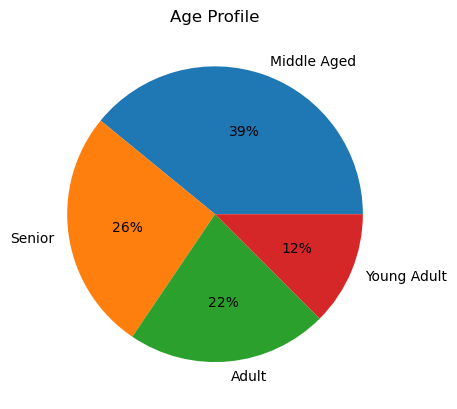

In [22]:
# pie chart for age
pie_chart_age = df_customer['age_profile'].value_counts().plot.pie(title = "Age Profile", label = '', autopct = ('%1.f%%'))

In [23]:
# export pie_chart_age
pie_chart_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_age.png'))

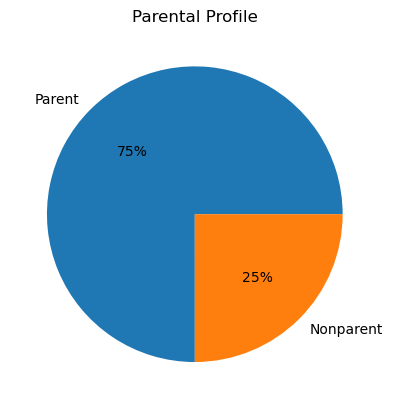

In [31]:
# pie chart for parent and nonparent
pie_chart_dependents = df_customer['parent_status'].value_counts().plot.pie(title = "Parental Profile", label = '', autopct = ('%1.f%%'))

In [32]:
# export pie_chart_dependents
pie_chart_dependents.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_dependents.png'))

In [33]:
# crossing age profile with parental profile
crosstab_3 = pd.crosstab(df_customer['age_profile'], df_customer['parent_status'], dropna = False)

In [34]:
crosstab_3.to_clipboard()

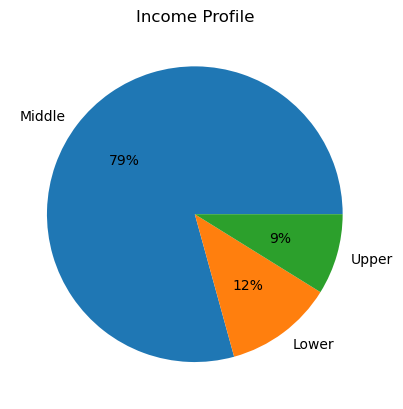

In [82]:
# create pie chart for income
pie_chart_income = df_customer['income_profile'].value_counts().plot.pie(title = "Income Profile", label = '', autopct = ('%1.f%%'))

In [84]:
# export pie_chart_income
pie_chart_income.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_income.png'))

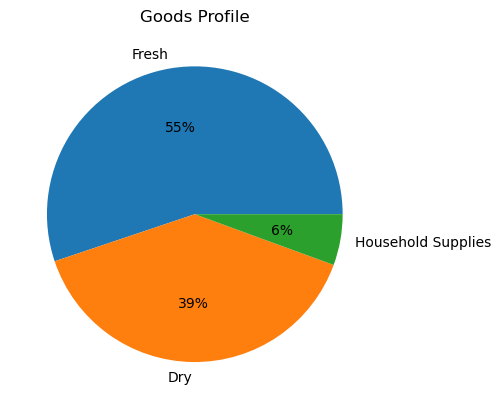

In [83]:
# create pie chart for goods
pie_chart_goods = df_customer['goods_profile'].value_counts().plot.pie(title = "Goods Profile", label = '', autopct = ('%1.f%%'))

In [85]:
# export pie_chart_goods
pie_chart_goods.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_chart_goods.png'))

# 04. Aggregate Customer Profiles

### Time Between Orders

In [87]:
# aggregate for age and time between orders
df_customer.groupby('age_profile').agg({'time_between_orders': ['mean', 'min', 'max']})

time_between_orders           
                           mean  min   max
age_profile                               
Adult                 10.818211  0.0  30.0
Middle Aged           10.821972  0.0  30.0
Senior                10.791788  0.0  30.0
Young Adult           10.799071  0.0  30.0

In [88]:
# aggregate for income and time between orders
df_customer.groupby('income_profile').agg({'time_between_orders': ['mean', 'min', 'max']})

time_between_orders           
                              mean  min   max
income_profile                               
Lower                    11.152223  0.0  30.0
Middle                   10.775511  0.0  30.0
Upper                    10.662901  0.0  30.0

In [89]:
# aggregate for goods and time between orders
df_customer.groupby('goods_profile').agg({'time_between_orders': ['mean', 'min', 'max']})

time_between_orders           
                                  mean  min   max
goods_profile                                    
Dry                          10.964350  0.0  30.0
Fresh                        10.680166  0.0  30.0
Household Supplies           11.012841  0.0  30.0

In [90]:
# aggregate for parental status and time between orders
df_customer.groupby('parent_status').agg({'time_between_orders': ['mean', 'min', 'max']})

time_between_orders           
                             mean  min   max
parent_status                               
Nonparent               10.791951  0.0  30.0
Parent                  10.816416  0.0  30.0

### Expenditure

In [93]:
# aggregate for age and expenditure
df_customer.groupby('age_profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
age_profile                         
Adult        11.930948  1.0  99999.0
Middle Aged  11.978745  1.0  99999.0
Senior       11.729477  1.0  99999.0
Young Adult  12.211808  1.0  99999.0

In [99]:
# check on max price
df_customer['prices'].value_counts(dropna = False)

12.3    565528
10.3    468677
4.0     408398
6.3     393164
1.3     386059
         ...  
20.2       107
22.7        88
21.5        72
18.3         9
21.0         8
Name: prices, Length: 242, dtype: int64

In [100]:
df_customer['prices'].describe()

count    2.930328e+07
mean     1.193136e+01
std      4.919193e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

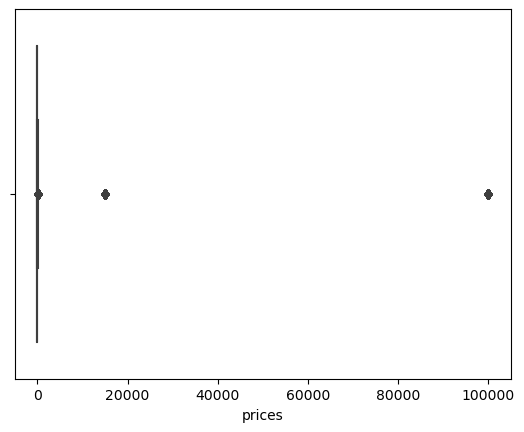

In [101]:
sns.boxplot(x = df_customer['prices'])
plt.show()

In [102]:
df_customer['prices'].quantile(0.75)

11.3

In [103]:
# turn outliers into NaNs
df_customer.loc[df_customer['prices'] >100, 'prices'] = np.nan

In [104]:
df_customer['prices'].max()

25.0

In [105]:
# try this again
# aggregate for age and expenditure
df_customer.groupby('age_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_profile                     
Adult        7.785345  1.0  25.0
Middle Aged  7.791685  1.0  25.0
Senior       7.797491  1.0  25.0
Young Adult  7.786502  1.0  25.0

In [106]:
# aggregate for income and expenditure
df_customer.groupby('income_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                    mean  min   max
income_profile                     
Lower           6.766304  1.0  25.0
Middle          7.928496  1.0  25.0
Upper           7.936830  1.0  25.0

In [107]:
# aggregate for goods and expenditure
df_customer.groupby('goods_profile').agg({'prices': ['mean', 'min', 'max']})

prices           
                        mean  min   max
goods_profile                          
Dry                 6.957688  1.0  20.0
Fresh               8.397991  1.0  25.0
Household Supplies  7.659296  1.0  15.0

In [108]:
# aggregate for parental status and expenditure
df_customer.groupby('parent_status').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
parent_status                     
Nonparent      7.790889  1.0  25.0
Parent         7.791279  1.0  25.0

# 04. Compare Customer Profiles with Regions and Departments

### Age

In [117]:
# crossing regions with age
crosstab_4 = pd.crosstab(df_customer['age_profile'], df_customer['region'], dropna = False) 

In [118]:
crosstab_4.to_clipboard()

In [111]:
# crossing age with departments
crosstab_5 = pd.crosstab(df_customer['age_profile'], df_customer['goods_profile'], dropna = False) 

In [113]:
crosstab_5.to_clipboard()

In [116]:
# crossing age with department_id
crosstab_6 = pd.crosstab(df_customer['age_profile'], df_customer['department_id'], dropna = False) 

In [115]:
crosstab_6.to_clipboard()

### Income

In [119]:
# crossing income with region
crosstab_7 = pd.crosstab(df_customer['income_profile'], df_customer['region'], dropna = False) 

In [120]:
crosstab_7.to_clipboard()

In [122]:
# crossing income with goods profile
crosstab_8 = pd.crosstab(df_customer['income_profile'], df_customer['goods_profile'], dropna = False) 

In [123]:
crosstab_8.to_clipboard()

### Goods

In [124]:
# crossing goods profile with region
crosstab_9 = pd.crosstab(df_customer['goods_profile'], df_customer['region'], dropna = False) 

In [125]:
crosstab_9.to_clipboard()

### Number of Dependents

In [126]:
# crossing parent_status with region
crosstab_10 = pd.crosstab(df_customer['parent_status'], df_customer['region'], dropna = False) 

In [127]:
crosstab_10.to_clipboard()

In [128]:
# crossing parent_status with goods profile
crosstab_11 = pd.crosstab(df_customer['parent_status'], df_customer['goods_profile'], dropna = False) 

In [129]:
crosstab_11.to_clipboard()

### Observations: Across all profiles, the South has the highest frequency for each profile of age, income, departments and parental status. We can see here that there is a strong customer base in the South across all different types of people. The lowest frequency across all types of customers comes from the Northeast.

### The fresh food department (bakery, produce, meat/seafood, dairy/eggs, deli) is the highest across all customer types with a significantly low number of people buying household supplies. Also, there is a bigger difference between upper and lower class individuals on the dry vs. the fresh food department with upper class individuals buying less items from the dry department.

# 06. Export Final Dataset

In [130]:
# export to pickle file
df_customer.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_dataset.pkl'))